# Project: Wrangling and Analyze Data

In [1]:
#import the neccessary libraries

import pandas as pd
import numpy as np
import tweepy as tw
import requests as rq
import matplotlib.pyplot as plt
%matplotlib inline
import os
from dotenv import load_dotenv

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import and load the dataset

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#view the 'twitter_archive' dataset

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#downloading the 'image_prediction.tsv' file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with rq.get(url) as r:
    with open('image_predictions.tsv', 'wb') as file:
        file.write(r.content)

In [5]:
#import and load the dataset

image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
#view the 'image_predictions' dataset

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#load api

load_dotenv()
api_key = os.getenv('api_keys')
api_secret = os.getenv('api_secrets')
access_token = os.getenv('access_tokens')
access_secret = os.getenv('access_secrets')

auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth)

In [8]:
#testing if connection & authentication was succesful

try:
    api.verify_credentials()
    print('Authentication Successful!!!')
except:
    print('Authentication Failed!!!')

Authentication Successful!!!


In [9]:
#getting the count of retweet & likes for each tweet using their tweet_ids via the API

tweet_ids = twitter_archive['tweet_id']

tweet_id = []
likes = []
retweets = []
failed_tweets = []7
    try:
        tweet = api.get_status(ids, tweet_mode = 'extended')
        tweet_id.append(ids)
        likes.append(tweet.favorite_count)
        retweets.append(tweet.retweet_count)
    except:
        failed_tweets.append(ids)

In [10]:
#creating a dataset with the count of retweets and likes

tweet_info = pd.DataFrame({'tweet_id': tweet_id, 'likes': likes, 'retweets': retweets})
tweet_info

,tweet_id,likes,retweets
0,892420643555336193,33598,6950
1,892177421306343426,29143,5253
2,891815181378084864,21931,3460
3,891689557279858688,36661,7161
4,891327558926688256,35053,7699
...,...,...,...
2318,666049248165822465,88,36
2319,666044226329800704,245,114
2320,666033412701032449,100,36
2321,666029285002620928,112,39


In [11]:
#creating a dataset with the list of tweet_ids that their tweets have been deleted

deleted_tweets = pd.DataFrame({'tweet_ids': failed_tweets})

deleted_tweets

,tweet_ids
0,888202515573088257
1,877611172832227328
2,873697596434513921
3,872668790621863937
4,872261713294495745
5,869988702071779329
6,866816280283807744
7,861769973181624320
8,856602993587888130
9,856330835276025856


In [12]:
#saving files gathered from API

tweet_info.to_csv('tweet_json.txt', index = False)
deleted_tweets.to_csv('deleted_tweets.csv', index = False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
#viewing the twitter_archive dataset

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
#assesing general info of the table

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#checking for duplicates

twitter_archive['tweet_id'].duplicated().sum()

0

In [16]:
#checking for missing values

twitter_archive[twitter_archive.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\r\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [18]:
#checking the retweet_status_id values to see how they are entered

twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [19]:
#checking list of columns

list(twitter_archive.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [20]:
#checking if the data does not exceed August 1st

twitter_archive['timestamp'].max()

'2017-08-01 16:23:56 +0000'

In [21]:
#checking the list of unique values

twitter_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [22]:
#checking the list of unique values

twitter_archive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [23]:
#checking the list of unique values

twitter_archive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [24]:
#checking the list of unique values

twitter_archive['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [25]:
#checking for retweets

twitter_archive[twitter_archive['text'].str.contains('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [26]:
#checking the list of unique values

twitter_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [27]:
twitter_archive.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [28]:
#view the dataset

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
#assesing general info of the table

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
#checking for duplicates

image_predictions['tweet_id'].duplicated().sum()

0

In [31]:
#checking for missing values

image_predictions.isna()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
#list of columns

list(image_predictions.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [33]:
#view the dataset

tweet_info.head()

,tweet_id,likes,retweets
0,892420643555336193,33598,6950
1,892177421306343426,29143,5253
2,891815181378084864,21931,3460
3,891689557279858688,36661,7161
4,891327558926688256,35053,7699


In [34]:
#assesing general info of the table

tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2323 non-null   int64
 1   likes     2323 non-null   int64
 2   retweets  2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [35]:
#checking for duplicates

tweet_info['tweet_id'].duplicated().sum()

0

In [36]:
#chech for missing values

tweet_info.isna()

,tweet_id,likes,retweets
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2318,False,False,False
2319,False,False,False
2320,False,False,False
2321,False,False,False


In [37]:
#list of columns

list(tweet_info.columns)

['tweet_id', 'likes', 'retweets']

### Quality issues
1. Drop the columns with too many null values (**in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**) as they wont be neccesary

2. Missing values represented as "None" instead of "NaN" in the **twitter_archive** dataset

3. **timestamp** & **retweeted_status_timestamp** as **object** instead of **datetime** in the **twitter_archive** dataset

4. **in_reply_to_status_id**, **retweeted_status_id**, **retweeted_user_id** & **in_reply_to_user_id** as **float** instead of **int** in the **twitter_archive** dataset

5. The **source** column should be of type **category** instead of **object** in the **twitter_archive** dataset

6. The **source** column needs to be sliced to get the actual source of the tweet rather than the whole HTML

7. We don't need the exact time of the tweet in the **twitter_archive** dataset, the date is okay 

8. We have predicions of **False** and we need just **True** values since its for dogs in the **image_predictions** dataset

9. Inconsistent dog type name predictions in  the **image_predictions** dataset

### Tidiness issues
1. The dog categories should be a categorical variable in a single column rather than 4 columns in the **twitter_archive** dataset

2. Retweeted posts not needed for this projected, should be deleted from the **twitter_archive** dataset

3. We need just 2 tables ie One with the whole tweet info(joining **twitter_archive** & **tweet_info** on tweet_id) and the second table should be the image predictions

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
tweet_info_clean = tweet_info.copy()
image_predictions_clean = image_predictions.copy()

# Quality Issues

### Issue #1:  Drop the columns with too many null values (**in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**) as they wont be neccesary

#### Define: The columns above wont be neccesary for this project and coupled with having too many null values they need to be dropped

#### Code

In [39]:
#create a list of the columns to be dropped

columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [40]:
#viewing the columns not needed

twitter_archive_clean[columns]

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN


In [41]:
#delete the listed columns from twitter_archive_clean table

twitter_archive_clean = twitter_archive_clean.drop(columns, axis = 1)

#### Test

In [42]:
#confirm the change

list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [43]:
#view in dataset

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:  Missing values represented as "None" instead of "NaN" in the **twitter_archive** dataset

#### Define: I'll be replacing the "None" with NaN so it can be used properly during analysis or further cleaning

#### Code

In [44]:
#view places with "None" instead of "NaN"

twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


In [45]:
#replacing "None" with NaN

twitter_archive_clean = twitter_archive_clean.replace('None', np.nan)

#### Test

In [46]:
#view dataset

twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2351,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN


In [47]:
twitter_archive_clean['doggo'].unique()

array([nan, 'doggo'], dtype=object)

In [48]:
twitter_archive_clean['floofer'].unique()

array([nan, 'floofer'], dtype=object)

In [49]:
twitter_archive_clean['pupper'].unique()

array([nan, 'pupper'], dtype=object)

In [50]:
twitter_archive_clean['puppo'].unique()

array([nan, 'puppo'], dtype=object)

### Issue #3: **timestamp** & **retweeted_status_timestamp** as **object** instead of **datetime** in the **twitter_archive** dataset


#### Define: The dates are represented as object and needs to be changed to datetime data type




#### Code:

In [51]:
#view data type of "timestamp"

twitter_archive_clean.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [52]:
#changing the timestamp to datetime data type

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [53]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #4:  **in_reply_to_status_id**, **retweeted_status_id**, **retweeted_user_id** & **in_reply_to_user_id** as **float** instead of **int** in the **twitter_archive** dataset


#### Define:  This would've been changed to int64 but since we dropped the columns no need for that anymore




#### Code:

#### Test

### Issue #5: The **source** column should be of type **category** instead of **object** in the **twitter_archive** dataset


#### Define: change the column to category data type


#### Code:

In [54]:
#view the "source" data type

twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [55]:
#changing the datatype

twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

#### Test

In [56]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #6: The **source** column needs to be sliced to get the actual source of the tweet rather than the whole HTML


#### Define: slice out the html part of the text




#### Code:

In [57]:
#view the "source" column formatting

twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
#slicing out the html tag part of the text

twitter_archive_clean['source'] = twitter_archive['source'].str.extract(r'>(.*?)<')

#### Test

In [59]:
#view again

twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [60]:
#view in dataset

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #7. We don't need the exact time of the tweet in the **twitter_archive** dataset, the date is okay 


#### Define: I'll strip the time from the timestamp column so the date alone will be left

#### Code:

In [61]:
#view how "timestamp" is formatted

twitter_archive_clean['timestamp'].sample(5)

748    2016-09-23 17:50:56+00:00
436    2017-01-14 17:00:24+00:00
830    2016-08-25 16:58:45+00:00
1250   2016-03-19 01:54:56+00:00
1174   2016-04-13 01:22:10+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [62]:
#slice out the time part of the "timestamp"

twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].dt.date

#### Test:

In [63]:
#view the "timestamp" column again

twitter_archive_clean['timestamp']

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: timestamp, Length: 2356, dtype: object

### Issue #8: We have predicions of **False** and we need just **True** values since its for dogs in the **image_predictions** dataset


#### Define: I'll be dropping rows where **p1_dog**  prediction is false since it has the highest prediction accuracy




#### Code:

In [64]:
#view the image_predictions of 'p1_dog', 'p2_dog' & 'p3_dog' predictions

image_predictions[['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']]

,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf
0,Welsh_springer_spaniel,True,0.465074,collie,True,0.156665,Shetland_sheepdog,True,0.061428
1,redbone,True,0.506826,miniature_pinscher,True,0.074192,Rhodesian_ridgeback,True,0.072010
2,German_shepherd,True,0.596461,malinois,True,0.138584,bloodhound,True,0.116197
3,Rhodesian_ridgeback,True,0.408143,redbone,True,0.360687,miniature_pinscher,True,0.222752
4,miniature_pinscher,True,0.560311,Rottweiler,True,0.243682,Doberman,True,0.154629
...,...,...,...,...,...,...,...,...,...
2070,basset,True,0.555712,English_springer,True,0.225770,German_short-haired_pointer,True,0.175219
2071,paper_towel,False,0.170278,Labrador_retriever,True,0.168086,spatula,False,0.040836
2072,Chihuahua,True,0.716012,malamute,True,0.078253,kelpie,True,0.031379
2073,Chihuahua,True,0.323581,Pekinese,True,0.090647,papillon,True,0.068957


* We can see how the prediction accuracy drops from each progressive prediction. So this tells us that the first prediction is the most accurate, therefore I'll drop rows where first prediction is false

In [65]:
#drops rows where "p1_dog" is False

image_predictions_clean = image_predictions_clean[image_predictions_clean['p1_dog'] != False]

#### Test

In [66]:
#check if any False is still in 'p1_dog'

image_predictions_clean[image_predictions_clean['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [67]:
#view dataset

image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Issue #9: Inconsistent dog type name predictions in the image_predictions dataset


#### Define: I'll remove the "_" and make everything lower case letters




#### Code:

In [68]:
#check the columns holding the dog names 'p1', 'p2', 'p3'

image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2068,Appenzeller,Border_collie,ice_lolly
2069,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
2070,basset,English_springer,German_short-haired_pointer
2072,Chihuahua,malamute,kelpie


In [69]:
#removing the "_" and making the names all lower case

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ').str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ').str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ').str.lower()

#### Test

In [70]:
#check columns with dog names again

image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman
...,...,...,...
2068,appenzeller,border collie,ice lolly
2069,chesapeake bay retriever,irish terrier,indian elephant
2070,basset,english springer,german short-haired pointer
2072,chihuahua,malamute,kelpie


In [71]:
#view in dataset

image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


# Tideness Issues

### Issue #1: The dog categories should be a categorical variable in a single column rather than 4 columns in the **twitter_archive** dataset



#### Define: I'll reshape the dataframe and make the dog type a single column and using fillna I'll fill the places where the dog type was specified




#### Code:

In [72]:
#view the dataset before reshaping
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [73]:
#reshaping the dataset with fillna()

twitter_archive_clean['dog_type'] = (twitter_archive_clean['doggo'].fillna(twitter_archive_clean['floofer'])
                              .fillna(twitter_archive_clean['puppo'])
                              .fillna(twitter_archive_clean['pupper']))

In [74]:
#drop the redundant columns('doggo', 'floofer', 'puppo', 'pupper')

twitter_archive_clean = twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'puppo', 'pupper'], axis = 1)

In [75]:
#change the dog_type to category data type and confirm its just the 4 categories we want

twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].astype('category')
twitter_archive_clean['dog_type'].value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_type, dtype: int64

#### Test

In [76]:
#view dataset

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [77]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   int64   
 1   timestamp           2356 non-null   object  
 2   source              2356 non-null   object  
 3   text                2356 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2356 non-null   int64   
 6   rating_denominator  2356 non-null   int64   
 7   name                1611 non-null   object  
 8   dog_type            380 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 149.9+ KB


### Issue #2: Retweeted posts not needed for this projected, should be deleted from the **twitter_archive** dataset


#### Define: I'll be deleting the rows with the retweeted posts "RT" at the beginning of the tweets




#### Code:

In [78]:
#check for rows with retweets

twitter_archive_clean[twitter_archive_clean['text'].str.contains('RT') == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
19,888202515573088257,2017-07-21,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN
32,886054160059072513,2017-07-15,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN
36,885311592912609280,2017-07-13,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN
68,879130579576475649,2017-06-26,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN
73,878404777348136964,2017-06-24,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN
...,...,...,...,...,...,...,...,...,...
1766,678399652199309312,2015-12-20,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,NaN,NaN
1860,675489971617296384,2015-12-12,Twitter for iPhone,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,NaN,NaN
1991,672622327801233409,2015-12-04,Twitter for iPhone,This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,12,10,NaN,pupper
2259,667550904950915073,2015-11-20,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN


In [79]:
#drop the retweets

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['text'].str.contains('RT') == False]

#### Test

In [80]:
#checking for retweets after dropping

twitter_archive_clean[twitter_archive_clean['text'].str.contains('RT')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type


### Issue #3: We need just 1 table ie One with the whole tweet info(joining **twitter_archive**, **image_predictions** & **tweet_info** on tweet_id) 


#### Define: I'll be joining the 3 tables on the "tweet_id" column to get a master dataset




#### Code:

In [81]:
#joining all three tables as one to create a master dataset

twitter_archive_master = pd.merge(twitter_archive_clean, tweet_info_clean, on = 'tweet_id', how = 'left').merge(image_predictions_clean, on = 'tweet_id', how = 'left')

#### Test

In [82]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2163
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2164 non-null   int64   
 1   timestamp           2164 non-null   object  
 2   source              2164 non-null   object  
 3   text                2164 non-null   object  
 4   expanded_urls       2106 non-null   object  
 5   rating_numerator    2164 non-null   int64   
 6   rating_denominator  2164 non-null   int64   
 7   name                1490 non-null   object  
 8   dog_type            342 non-null    category
 9   likes               2153 non-null   float64 
 10  retweets            2153 non-null   float64 
 11  jpg_url             1470 non-null   object  
 12  img_num             1470 non-null   float64 
 13  p1                  1470 non-null   object  
 14  p1_conf             1470 non-null   float64 
 15  p1_dog              1470 non-null   ob

In [83]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,likes,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33598.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29143.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,21931.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36661.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35053.0,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [85]:
#load in the new dataset

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [86]:
#view dataset

twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,likes,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33598.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29143.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,21931.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36661.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35053.0,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,666049248165822465,2015-11-16,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,88.0,...,1.0,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2160,666044226329800704,2015-11-16,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,245.0,...,1.0,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2161,666033412701032449,2015-11-15,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,100.0,...,1.0,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2162,666029285002620928,2015-11-15,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,112.0,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


In [87]:
#check the dimension of the data

twitter_archive_master.shape

(2164, 22)

In [88]:
#check general info of dataset

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2164 non-null   int64  
 1   timestamp           2164 non-null   object 
 2   source              2164 non-null   object 
 3   text                2164 non-null   object 
 4   expanded_urls       2106 non-null   object 
 5   rating_numerator    2164 non-null   int64  
 6   rating_denominator  2164 non-null   int64  
 7   name                1490 non-null   object 
 8   dog_type            342 non-null    object 
 9   likes               2153 non-null   float64
 10  retweets            2153 non-null   float64
 11  jpg_url             1470 non-null   object 
 12  img_num             1470 non-null   float64
 13  p1                  1470 non-null   object 
 14  p1_conf             1470 non-null   float64
 15  p1_dog              1470 non-null   object 
 16  p2    

* I noticed the columns(**dog_type** & **source**) I changed to **category** data type are back to **object** type  
* the **timestamp** column is no longer in datetime also  
so I'll fix that

In [89]:
#changing the data types back

twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')
twitter_archive_master['dog_type'] = twitter_archive_master['dog_type'].astype('category')

In [90]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

In [91]:
#view data info to confirm change

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2164 non-null   int64         
 1   timestamp           2164 non-null   datetime64[ns]
 2   source              2164 non-null   category      
 3   text                2164 non-null   object        
 4   expanded_urls       2106 non-null   object        
 5   rating_numerator    2164 non-null   int64         
 6   rating_denominator  2164 non-null   int64         
 7   name                1490 non-null   object        
 8   dog_type            342 non-null    category      
 9   likes               2153 non-null   float64       
 10  retweets            2153 non-null   float64       
 11  jpg_url             1470 non-null   object        
 12  img_num             1470 non-null   float64       
 13  p1                  1470 non-null   object      

After the whole cleaning and wrangling process we have just 2134 rows and 22 columns of data from the combined dataset

I'll start the analysis by checking the basic statistics first

In [92]:
twitter_archive_master.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2164.0,7.371741e+17,6.753662e+16,6.660209e+17,6.768214e+17,7.097095e+17,7.896066e+17,8.924206e+17
rating_numerator,2164.0,1.322643e+01,4.784658e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2164.0,1.049538e+01,7.036821e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02
likes,2153.0,7.495183e+03,1.104017e+04,4.500000e+01,1.589000e+03,3.376000e+03,9.276000e+03,1.437250e+05
retweets,2153.0,2.205138e+03,3.919328e+03,1.000000e+00,4.740000e+02,1.051000e+03,2.518000e+03,7.007400e+04
img_num,1470.0,1.214286e+00,5.760715e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,1470.0,6.152487e-01,2.597025e-01,4.433340e-02,3.935985e-01,6.169230e-01,8.532555e-01,9.999560e-01
p2_conf,1470.0,1.411878e-01,1.025932e-01,2.335910e-05,5.701785e-02,1.273070e-01,2.039027e-01,4.676780e-01
p3_conf,1470.0,6.159664e-02,5.265141e-02,2.160900e-07,1.524325e-02,4.967815e-02,9.499832e-02,2.734190e-01


In [93]:
#formatting the result t omake them more easier to read
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [94]:
twitter_archive_master.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2164.00000,737174061453578752.00000,67536615264242736.00000,666020888022790144.00000,676821381298958336.00000,709709507176351744.00000,789606596073633792.00000,892420643555336192.00000
rating_numerator,2164.00000,13.22643,47.84658,0.00000,10.00000,11.00000,12.00000,1776.00000
rating_denominator,2164.00000,10.49538,7.03682,0.00000,10.00000,10.00000,10.00000,170.00000
likes,2153.00000,7495.18300,11040.17128,45.00000,1589.00000,3376.00000,9276.00000,143725.00000
retweets,2153.00000,2205.13841,3919.32770,1.00000,474.00000,1051.00000,2518.00000,70074.00000
img_num,1470.00000,1.21429,0.57607,1.00000,1.00000,1.00000,1.00000,4.00000
p1_conf,1470.00000,0.61525,0.25970,0.04433,0.39360,0.61692,0.85326,0.99996
p2_conf,1470.00000,0.14119,0.10259,0.00002,0.05702,0.12731,0.20390,0.46768
p3_conf,1470.00000,0.06160,0.05265,0.00000,0.01524,0.04968,0.09500,0.27342


From the above table we can see some interesting results such as:
* The tweet with the lowest amount of likes was just **45 likes** & the highest **144,343 likes** 
* The tweet with the lowest amount of retweets has just **1 retweet** & the highest **70,383 retweets**
* The best/most accurate dog prediction using the first prediction **p1_conf** is **99%** accurate

Check if theres a correlation between **likes** and **retweets**

In [95]:
#check correlation

correlation = twitter_archive_master['likes'].corr(twitter_archive_master['retweets'])
correlation = round(correlation, 2)

#print result of correlation
print('The corellation between Likes & Retweets is : ', correlation)

The corellation between Likes & Retweets is :  0.93


* From the above we can see a strong +ve correlation between the amount of likes and retweets. Note we should still keep in mind that this does not imply causation

I'll be checking how the amount of likes and retweets differs among the diffrent tweets **sources**

In [96]:
#creating a subset of the dataset for this analysis

tweet_sources = twitter_archive_master.groupby('source')['likes', 'retweets'].sum().sort_values(by = 'likes', ascending = False)
tweet_sources

C:\Users\Phantom\AppData\Local\Temp\ipykernel_5928\3724619455.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_sources = twitter_archive_master.groupby('source')['likes', 'retweets'].sum().sort_values(by = 'likes', ascending = False)


,likes,retweets
source,,
Twitter for iPhone,15358737.00000,4403309.00000
Vine - Make a Scene,589965.00000,268816.00000
Twitter Web Client,150122.00000,59037.00000
TweetDeck,38305.00000,16501.00000


* From the above result we can see that **Twitter for iPhone** has the most likes nd retweets

I'll also love to check if the **ratin_numerator** affects the amount of **like** & **retweets**

In [97]:
#creating a subset of the dataset for this analysis

tweet_rating = twitter_archive_master.groupby('rating_numerator')['likes', 'retweets'].sum().sort_values(by = 'likes', ascending = False)
tweet_rating

C:\Users\Phantom\AppData\Local\Temp\ipykernel_5928\3850543222.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tweet_rating = twitter_archive_master.groupby('rating_numerator')['likes', 'retweets'].sum().sort_values(by = 'likes', ascending = False)


,likes,retweets
rating_numerator,,
13,5540215.00000,1613483.00000
12,4520755.00000,1192248.00000
11,2453794.00000,749275.00000
10,1479144.00000,507924.00000
14,984821.00000,296963.00000
9,347544.00000,112502.00000
8,199745.00000,69818.00000
7,167931.00000,58077.00000
5,116092.00000,35973.00000


* The above results goes to show that the higher the rating the more likes and retweets the tweet gets except for the case of rating(15). We should also note that this does not neccesarily implies causation as further statistical analysis would need to be done

### Insights:
1. There's a strong positive correlation between the number of likes and retweets but we musnt take this as causality.  

2. The tweets from iPhone seem to get most likes & retweets but this can also be due to the fact that most of the tweets were from iPhones.  

3. The dog with the higher ratings had more retweets and likes from my analysis but we should take into account of those with the rating of 15 as they were having very low likes and retweets also.

### Visualization

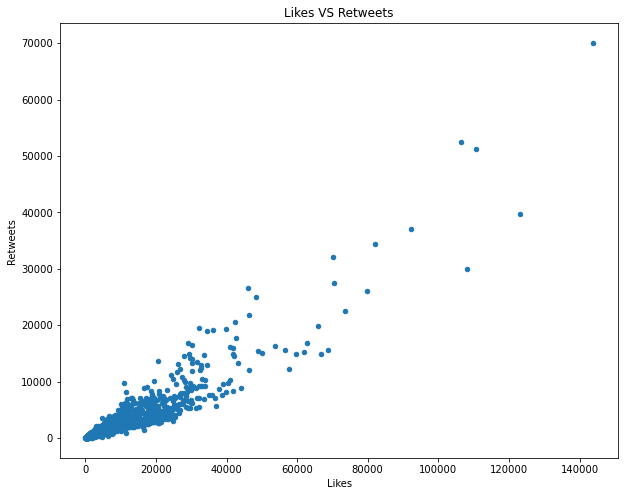

In [98]:
#creating the scatterplot to show correlation

twitter_archive_master.plot.scatter(x = 'likes', y = 'retweets', figsize = (10, 8))
plt.title('Likes VS Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets');

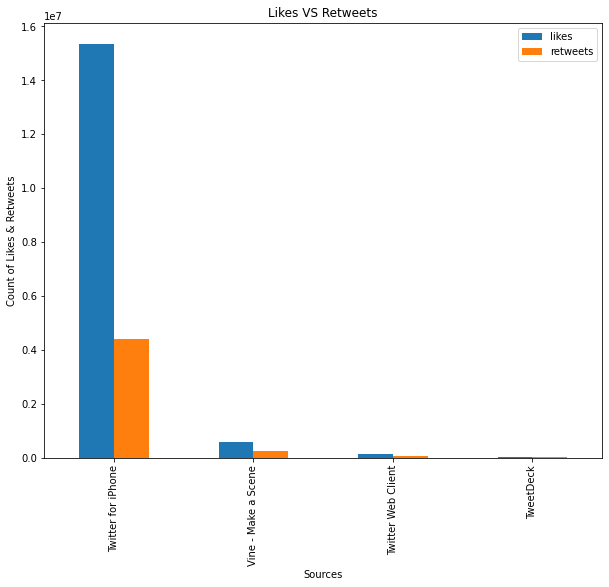

In [99]:
#creating the barchart

tweet_sources.plot.bar(figsize = (10, 8))
plt.title('Likes VS Retweets')
plt.xlabel('Sources')
plt.ylabel('Count of Likes & Retweets');

<AxesSubplot:ylabel='retweets'>

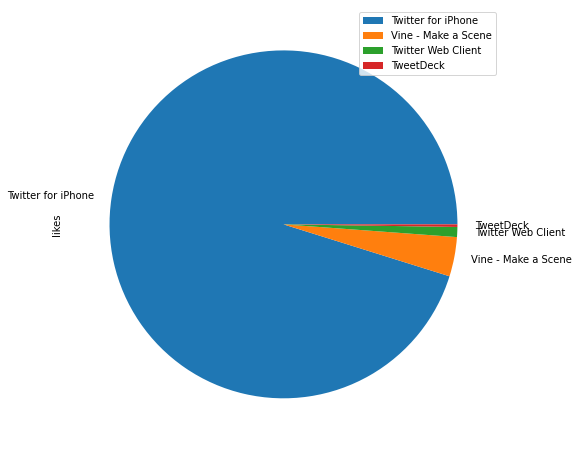

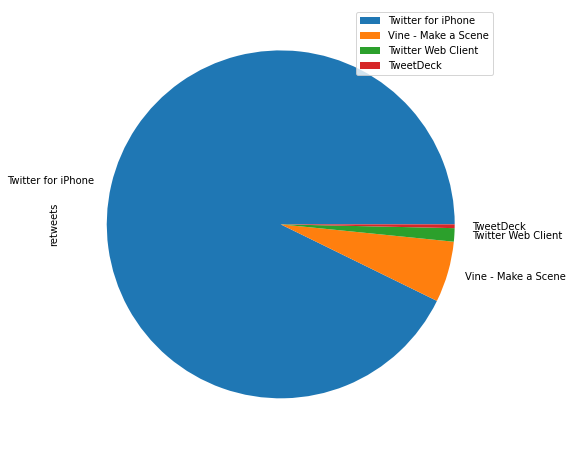

In [100]:
tweet_sources.plot.pie(y = 'likes', figsize = (8, 8)),
tweet_sources.plot.pie(y = 'retweets', figsize = (8, 8))

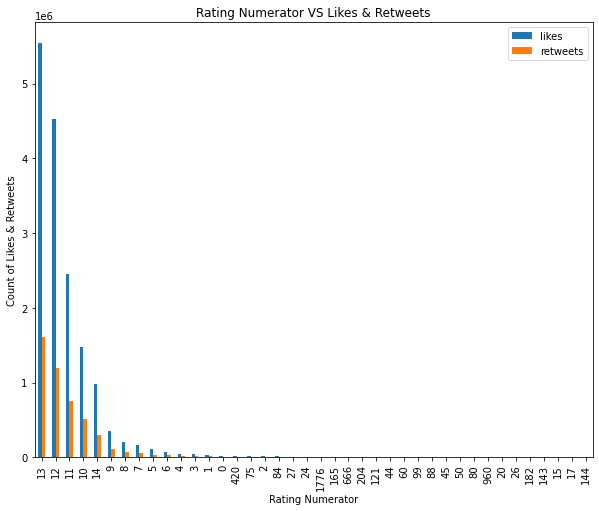

In [101]:
#creating the barchart

tweet_rating.plot.bar(figsize = (10, 8))
plt.title('Rating Numerator VS Likes & Retweets')
plt.xlabel('Rating Numerator')
plt.ylabel('Count of Likes & Retweets');